# Data project: Price cycles in the market for prescription drugs after patent expiry

## Content
### 1. Introduction
### 2. Data reading, cleaning and selecting
### 3. Expectations to the market mechanisms (normal situation)
### 4. Analyzing the drug Lamotrigin (price cycles)
### 5. Coonclusion


## 1. Introduction

In this project we will attempt to show the cyclic behaviour in some medical prices after the patent has expired, observed by the study "Priscykler i markedet for receptpligtig medicin efter patentudløb”. It will serve to demonstrate the matter of possible colusion by involving key points from competition theory by Maskin and Tirole (1988). In the empirical analysis we will investigate whether these cycles appears in data for the danish medicine prices in the period 2nd febuary 2015 - 23rd of marts 2020. 

Pharmaceutical manufacturers in Denmark sell medicines through two channels: the primary healthcare sector, which involves sales to the pharmacies, and the secondary sector in which sales are made to
hospitals. 

Before the competing phase, the company that developed the drug has a patent. The patent creates an incentive for the company to invest in new medicines, and with the exclusive right to sell the drug for a number of years, the company can receive research and production costs. In the period when the patent is valid, the market can be characterized as monopolistic and may have an inelastic demand curve, depending on of the type of drug. 

After the expiry of the patent, the prices of drugs that are sold to the pharmacies directly by the competing companies. Every 14 days, companies have the opportunity to report a new price electronically, where the company has
has bid the lowest price in the same substitution group, wins the bidding round. The pharmacists are obliged to offer patients the cheapest drug within the same substitute group,
and thus the company secures the largest market share, approx. 70 per cent until the next bidding round (”Priscykler i markedet for receptpligtig medicin efter patentudløb” p. 2). 

The data we will be working with in this project is containing these exactly 14-days prices.

## 2. Data reading, cleaning and selecting

Import and set magics: 

In [37]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import ipywidgets as widgets
import seaborn as sns; sns.set()
import dataproject
import pylab

In [38]:
#1. Importing excel sheet for analysis
medprices_dk = pd.read_excel('meddata.xlsx')
medprices_dk

,ATC,Lægemiddel,Varenummer,Pakning,Styrke,Form,Firma,Indikator,20150202,20150216,...,20191118,20191202,20191216,20191230,20200113,20200127,20200210,20200224,20200309,20200323
0,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AIP,407.36,407.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AUP,570.25,570.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A01AA01,Bifluorid,43158,10 g,NaN,dentalsuspension,Voco,AIP,602.07,602.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64863,V08DA05,SonoVue,5615,1 sæt,8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Bracco Imaging Scandinavia,AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64864,V08DA05,SonoVue,589726,1 sæt (Orifarm),8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Orifarm,AIP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64865,V08DA05,SonoVue,589726,1 sæt (Orifarm),8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Orifarm,AUP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64866,V08DA05,SonoVue,589726,1 sæt (Orifarm),8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Orifarm,DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#1. Importing excel sheet for analysis
medprices_dk = pd.read_excel('meddata.xlsx')
medprices_dk

,ATC,Lægemiddel,Varenummer,Pakning,Styrke,Form,Firma,Indikator,20150202,20150216,...,20191118,20191202,20191216,20191230,20200113,20200127,20200210,20200224,20200309,20200323
0,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AIP,407.36,407.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AUP,570.25,570.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A01AA01,Bifluorid,43158,10 g,NaN,dentalsuspension,Voco,AIP,602.07,602.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64863,V08DA05,SonoVue,5615,1 sæt,8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Bracco Imaging Scandinavia,AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64864,V08DA05,SonoVue,589726,1 sæt (Orifarm),8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Orifarm,AIP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64865,V08DA05,SonoVue,589726,1 sæt (Orifarm),8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Orifarm,AUP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64866,V08DA05,SonoVue,589726,1 sæt (Orifarm),8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Orifarm,DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# 2. Editing frame structure

english = {'Lægemiddel':'Medicine', 
                  'Varenummer':'Product_number', 
                  'Pakning':'Packaging', 
                  'Styrke':'Strength', 
                  'Firma':'Company', 
                  'Indikator':'Indicator'}
medprices_dk.rename(columns = english, inplace=True) # Convert columns from Danish to English

column_v = list(medprices_dk.columns.values) # Create list of dataframes column names
column_v= column_v[8:]# narrow list to only focus on date variables

date_to_string = {} # Create dictionary for renaming date variables

# Loop throught all possible date variables and add an e in front as variables in python cannot begin with a numbers
for i in column_v:
    date_to_string[i] = f'e{i}'

medprices_dk.rename(columns = date_to_string, inplace=True) # Rename date variables in primary dataframe
medprices_dk






,ATC,Medicine,Product_number,Packaging,Strength,Form,Company,Indicator,e20150202,e20150216,...,e20191118,e20191202,e20191216,e20191230,e20200113,e20200127,e20200210,e20200224,e20200309,e20200323
0,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AIP,407.36,407.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AUP,570.25,570.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A01AA01,Bifluorid,43158,10 g,NaN,dentalsuspension,Voco,AIP,602.07,602.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64863,V08DA05,SonoVue,5615,1 sæt,8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Bracco Imaging Scandinavia,AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64864,V08DA05,SonoVue,589726,1 sæt (Orifarm),8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Orifarm,AIP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64865,V08DA05,SonoVue,589726,1 sæt (Orifarm),8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Orifarm,AUP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64866,V08DA05,SonoVue,589726,1 sæt (Orifarm),8 mikroliter/ml,"pulver og solvens til injektionsvæske, disperg...",Orifarm,DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Expectations to the market mechanisms (normal situation)

According to theory, the transition from a monopolistic market state to complete competition should push down the prices of medicines, as several players can enter the market. As the price moves towards marginal costs, fiercer competition arises. Of course, there may be supply or demand shocks, costly entry barriers, etc., but all else equal, the price should fall after patent expiry. 

In order to illustrate this, we have found a drug with an expiry of the patent in april 2015. 
The drug is named Aripiprazole, and is a treatment of psychoses. At the beginning of 2015,full-year forecasts were expected to see a major fall in prices for the drug immediately following the expiry of the patent, ie April 2015. However, the price falls did not break through until the end of 2015. Price falls are now at 80-90%.

INDSÆT GRAPH MED PRISUDVIKLINGEN 

In [41]:
Aripiprazol_df = medprices_dk_copy2.loc[medprices_dk_copy2['Medicine'].isin(['Aripiprazol "Accord Healthcare"', 'Aripiprazol "Krka"','Aripiprazol "Stada"','Aripiprazol "Accord"','Aripiprazol "Aristo"','Aripiprazol "Medical Valley"','Aripiprazol "Sandoz"','Aripiprazol "Teva"']) ]
a=aripiprazol2.Indicator.str.contains('AUP_pr_DDD')
Aripiprazol_df=Aripiprazol_dfloc[a, :]
drop_list=['ATC', 'Form', 'Medicine']
Aripiprazol_df

,ATC,Medicine,Product_number,Packaging,Strength,Form,Company,Indicator,e20150202,e20150216,...,e20191118,e20191202,e20191216,e20191230,e20200113,e20200127,e20200210,e20200224,e20200309,e20200323
46883,N05AX12,"Aripiprazol ""Accord Healthcare""",79410,100 stk.,10 mg,tabletter,Teva (S›borg),AUP_pr_DDD,NaN,NaN,...,5.579972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46887,N05AX12,"Aripiprazol ""Accord Healthcare""",113971,28 stk. (blister),10 mg,tabletter,Teva (S›borg),AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46891,N05AX12,"Aripiprazol ""Accord Healthcare""",173895,100 stk.,15 mg,tabletter,Teva (S›borg),AUP_pr_DDD,NaN,NaN,...,0.455000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46895,N05AX12,"Aripiprazol ""Accord Healthcare""",178885,150 ml,1 mg/ml,oral opløsning,Teva (S›borg),AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46899,N05AX12,"Aripiprazol ""Accord Healthcare""",418119,56 stk. (blister),5 mg,tabletter,Teva (S›borg),AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46903,N05AX12,"Aripiprazol ""Accord Healthcare""",506809,100 stk.,5 mg,tabletter,Teva (S›borg),AUP_pr_DDD,NaN,NaN,...,3.816038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46907,N05AX12,"Aripiprazol ""Accord Healthcare""",540648,56 stk. (blister),15 mg,tabletter,Teva (S›borg),AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46911,N05AX12,"Aripiprazol ""Accord Healthcare""",542634,56 stk. (blister),10 mg,tabletter,Teva (S›borg),AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46915,N05AX12,"Aripiprazol ""Accord Healthcare""",554817,28 stk. (blister),15 mg,tabletter,Teva (S›borg),AUP_pr_DDD,NaN,NaN,...,0.792857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46919,N05AX12,"Aripiprazol ""Krka""",52737,56 stk. (blister),5 mg,tabletter,Krka AB,AUP_pr_DDD,119.304120,112.714952,...,1.995500,1.757111,1.757111,1.518723,1.513366,1.513366,1.513366,1.513366,1.384797,1.384797


In [42]:
# 4. Create long format of dataframe 

aripiprazol_long= pd.wide_to_long(aripiprazol2, stubnames='e', i="Product_number", j='Date') # Created long format of the lamotrigin Dataframe
e_grouped = aripiprazol_long.groupby('Date')['e'] # Grouped by product number
aripiprazol_long= aripiprazol_long.sort_values(['Date','Product_number']) # Organized product number by date
aripiprazol_long

,,Packaging,Indicator,Strength,ATC,Form,Medicine,Company,e
Product_number,Date,,,,,,,,
37768,20150202,28 stk. (blister),AUP_pr_DDD,5 mg,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,NaN
52737,20150202,56 stk. (blister),AUP_pr_DDD,5 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,119.30412
63519,20150202,150 ml,AUP_pr_DDD,1 mg/ml,N05AX12,oral opløsning,"Aripiprazol ""Stada""",Stada Nordic,NaN
72209,20150202,28 stk. (blister),AUP_pr_DDD,15 mg,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,NaN
79410,20150202,100 stk.,AUP_pr_DDD,10 mg,N05AX12,tabletter,"Aripiprazol ""Accord Healthcare""",Teva (S›borg),NaN
...,...,...,...,...,...,...,...,...,...
521910,20200323,28 stk. (blister),AUP_pr_DDD,30 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,NaN
523039,20200323,28 stk. (blister),AUP_pr_DDD,10 mg,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,NaN
540648,20200323,56 stk. (blister),AUP_pr_DDD,15 mg,N05AX12,tabletter,"Aripiprazol ""Accord Healthcare""",Teva (S›borg),NaN


In [43]:

aripiprazol_long.isnull().sum() # Explore how many null values are in each column of your dataset


Packaging       0
Indicator       0
Strength        0
ATC             0
Form            0
Medicine        0
Company         0
e            1623
dtype: int64

In [44]:
aripiprazol_long=aripiprazol_long[aripiprazol_long['e'].notna()]
aripiprazol_long

,,Packaging,Indicator,Strength,ATC,Form,Medicine,Company,e
Product_number,Date,,,,,,,,
52737,20150202,56 stk. (blister),AUP_pr_DDD,5 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,119.304120
88445,20150202,56 stk. (blister),AUP_pr_DDD,15 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,29.277679
107657,20150202,56 stk. (blister),AUP_pr_DDD,10 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,57.091581
113143,20150202,56 stk. (blister),AUP_pr_DDD,30 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,33.058929
114662,20150202,14 stk. (blister),AUP_pr_DDD,5 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,140.529248
...,...,...,...,...,...,...,...,...,...
396362,20200323,56 stk. (blister),AUP_pr_DDD,10 mg,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,2.025018
403579,20200323,28 stk. (blister),AUP_pr_DDD,15 mg,N05AX12,smeltetabletter,"Aripiprazol ""Stada""",PharmaCoDane,21.775000
427375,20200323,30 stk. (blister),AUP_pr_DDD,15 mg,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,1.261667


In [45]:
aripiprazol_long.isnull().sum() # Explore how many null values are in each column of your dataset

Packaging    0
Indicator    0
Strength     0
ATC          0
Form         0
Medicine     0
Company      0
e            0
dtype: int64

In [46]:
aripiprazol_long.rename(columns={"e": "Price"}, inplace=True)
aripiprazol_long

,,Packaging,Indicator,Strength,ATC,Form,Medicine,Company,Price
Product_number,Date,,,,,,,,
52737,20150202,56 stk. (blister),AUP_pr_DDD,5 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,119.304120
88445,20150202,56 stk. (blister),AUP_pr_DDD,15 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,29.277679
107657,20150202,56 stk. (blister),AUP_pr_DDD,10 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,57.091581
113143,20150202,56 stk. (blister),AUP_pr_DDD,30 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,33.058929
114662,20150202,14 stk. (blister),AUP_pr_DDD,5 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,140.529248
...,...,...,...,...,...,...,...,...,...
396362,20200323,56 stk. (blister),AUP_pr_DDD,10 mg,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,2.025018
403579,20200323,28 stk. (blister),AUP_pr_DDD,15 mg,N05AX12,smeltetabletter,"Aripiprazol ""Stada""",PharmaCoDane,21.775000
427375,20200323,30 stk. (blister),AUP_pr_DDD,15 mg,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,1.261667


In [47]:
aripiprazol_long.loc[aripiprazol_long['Packaging'] == '56 stk. (blister)']

,,Packaging,Indicator,Strength,ATC,Form,Medicine,Company,Price
Product_number,Date,,,,,,,,
52737,20150202,56 stk. (blister),AUP_pr_DDD,5 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,119.304120
88445,20150202,56 stk. (blister),AUP_pr_DDD,15 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,29.277679
107657,20150202,56 stk. (blister),AUP_pr_DDD,10 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,57.091581
113143,20150202,56 stk. (blister),AUP_pr_DDD,30 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,33.058929
52737,20150216,56 stk. (blister),AUP_pr_DDD,5 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,112.714952
...,...,...,...,...,...,...,...,...,...
107657,20200323,56 stk. (blister),AUP_pr_DDD,10 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,2.350467
113143,20200323,56 stk. (blister),AUP_pr_DDD,30 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,0.723214
197123,20200323,56 stk. (blister),AUP_pr_DDD,30 mg,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,0.723214


In [48]:
aripiprazol_long['Price'].max()

141.793443325477

In [49]:
aripiprazol_long['Price'].min()

0.113392857142857

In [50]:
del aripiprazol_long['Indicator']
aripiprazol_long

,,Packaging,Strength,ATC,Form,Medicine,Company,Price
Product_number,Date,,,,,,,
52737,20150202,56 stk. (blister),5 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,119.304120
88445,20150202,56 stk. (blister),15 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,29.277679
107657,20150202,56 stk. (blister),10 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,57.091581
113143,20150202,56 stk. (blister),30 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,33.058929
114662,20150202,14 stk. (blister),5 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,140.529248
...,...,...,...,...,...,...,...,...
396362,20200323,56 stk. (blister),10 mg,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,2.025018
403579,20200323,28 stk. (blister),15 mg,N05AX12,smeltetabletter,"Aripiprazol ""Stada""",PharmaCoDane,21.775000
427375,20200323,30 stk. (blister),15 mg,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,1.261667


In [51]:

del aripiprazol_long['Packaging']
aripiprazol_long

,,Strength,ATC,Form,Medicine,Company,Price
Product_number,Date,,,,,,
52737,20150202,5 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,119.304120
88445,20150202,15 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,29.277679
107657,20150202,10 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,57.091581
113143,20150202,30 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,33.058929
114662,20150202,5 mg,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,140.529248
...,...,...,...,...,...,...,...
396362,20200323,10 mg,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,2.025018
403579,20200323,15 mg,N05AX12,smeltetabletter,"Aripiprazol ""Stada""",PharmaCoDane,21.775000
427375,20200323,15 mg,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,1.261667


In [52]:
del aripiprazol_long['Strength']
aripiprazol_long

,,ATC,Form,Medicine,Company,Price
Product_number,Date,,,,,
52737,20150202,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,119.304120
88445,20150202,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,29.277679
107657,20150202,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,57.091581
113143,20150202,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,33.058929
114662,20150202,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,140.529248
...,...,...,...,...,...,...
396362,20200323,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,2.025018
403579,20200323,N05AX12,smeltetabletter,"Aripiprazol ""Stada""",PharmaCoDane,21.775000
427375,20200323,N05AX12,tabletter,"Aripiprazol ""Stada""",PharmaCoDane,1.261667


In [53]:
e_min = aripiprazol_long.groupby('Date').min()
e_min


,ATC,Form,Medicine,Company,Price
Date,,,,,
20150202,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,29.277679
20150216,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,26.837500
20150302,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,21.958036
20150316,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,20.006250
20150330,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,17.078571
...,...,...,...,...,...
20200127,N05AX12,oral opløsning,"Aripiprazol ""Krka""",Krka AB,0.579464
20200210,N05AX12,oral opløsning,"Aripiprazol ""Krka""",Krka AB,0.715500
20200224,N05AX12,oral opløsning,"Aripiprazol ""Krka""",Krka AB,0.715500


In [54]:
e_min['Date1'] = e_min.index
e_min
e_min.dtypes

ATC          object
Form         object
Medicine     object
Company      object
Price       float64
Date1         int64
dtype: object

In [55]:
# convert date to date format
e_min['DateTime'] = e_min['Date1'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
e_min

,ATC,Form,Medicine,Company,Price,Date1,DateTime
Date,,,,,,,
20150202,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,29.277679,20150202,2015-02-02
20150216,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,26.837500,20150216,2015-02-16
20150302,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,21.958036,20150302,2015-03-02
20150316,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,20.006250,20150316,2015-03-16
20150330,N05AX12,tabletter,"Aripiprazol ""Krka""",Krka AB,17.078571,20150330,2015-03-30
...,...,...,...,...,...,...,...
20200127,N05AX12,oral opløsning,"Aripiprazol ""Krka""",Krka AB,0.579464,20200127,2020-01-27
20200210,N05AX12,oral opløsning,"Aripiprazol ""Krka""",Krka AB,0.715500,20200210,2020-02-10
20200224,N05AX12,oral opløsning,"Aripiprazol ""Krka""",Krka AB,0.715500,20200224,2020-02-24


(array([735599., 735964., 736330., 736695., 737060., 737425.]),
 <a list of 6 Text xticklabel objects>)

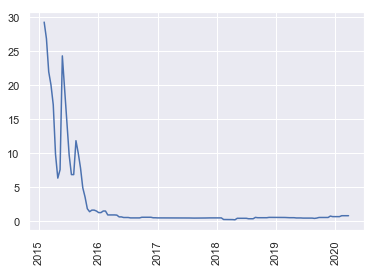

In [56]:
e_min_plot=e_min.sort_values('DateTime', ascending=True)
plt.plot(e_min_plot['DateTime'], e_min_plot['Price'])
plt.xticks(rotation='vertical')

## 4. Analyzing the drug Lamotrigin (price cycles)


In [57]:
medprices_dk_copy = medprices_dk.copy()
lamotrigin=medprices_dk_copy.loc[medprices_dk_copy['Medicine'].isin(['Lamotrigin "1A Farma"', 'Lamotrigin "Stada"', 'Lamotrigin "Orifarm"','Lamotrigin "Bluefish"','Lamotrigin "Aurobindo"', 'Lamotrigin "Amneal"', 'Lamotrigin "Abacus Medicine"', 'Lamotrigin "Mylan"']) ]
I=lamotrigin.Indicator.str.contains('AUP_pr_DDD')
lamotrigin=lamotrigin.loc[I, :]
drop_list=['ATC', 'Form', 'Medicine']
lamotrigin.drop(drop_list, axis=1, inplace=True)
lamotrigin.reset_index()


,index,Product_number,Packaging,Strength,Company,Indicator,e20150202,e20150216,e20150302,e20150316,...,e20191118,e20191202,e20191216,e20191230,e20200113,e20200127,e20200210,e20200224,e20200309,e20200323
0,40959,60406,60 stk. (blister),100 mg,1A Farma,AUP_pr_DDD,2.672500,4.430000,4.430000,4.430000,...,19.615000,19.615000,NaN,NaN,NaN,NaN,8.905000,6.005000,6.005000,10.390000
1,40963,70380,60 stk. (blister),100 mg,1A Farma,AUP_pr_DDD,4.510000,3.760000,3.760000,3.350000,...,15.150000,14.895000,14.895000,14.895000,12.345000,12.345000,12.345000,12.345000,12.345000,12.345000
2,40967,83373,60 stk. (blister),50 mg,1A Farma,AUP_pr_DDD,6.700000,4.025000,3.850000,6.665000,...,27.055000,27.055000,27.055000,27.055000,26.985000,26.985000,20.915000,20.915000,20.915000,20.915000
3,40971,95506,100 stk. (blister),100 mg,1A Farma,AUP_pr_DDD,5.985060,5.985060,6.723067,6.723067,...,5.886059,5.886059,5.886059,5.886059,4.858549,4.615546,4.615546,4.615546,8.701587,8.701587
4,40975,150553,60 stk. (blister),200 mg,1A Farma,AUP_pr_DDD,1.982500,1.760000,1.691250,1.537500,...,2.706250,2.706250,NaN,NaN,NaN,NaN,15.343750,15.343750,15.343750,NaN
5,40979,172849,50 stk. (blister),200 mg,1A Farma A/S,AUP_pr_DDD,1.599016,1.764018,1.764018,1.624516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,40983,399531,60 stk. (blister),200 mg,1A Farma A/S,AUP_pr_DDD,2.673750,1.742500,1.742500,1.675000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,40987,402064,100 stk. (blister),200 mg,1A Farma,AUP_pr_DDD,1.455743,1.455743,1.424993,1.424993,...,4.342478,4.342478,3.671232,3.671232,3.195734,3.195734,2.873986,2.873986,2.570237,3.339733
8,40991,417392,60 stk. (blister),50 mg,1A Farma,AUP_pr_DDD,21.455000,6.835000,6.290000,6.290000,...,NaN,10.405000,10.405000,9.865000,9.840000,9.570000,9.570000,9.570000,13.765000,13.765000
9,40995,419337,50 stk. (blister),100 mg,1A Farma A/S,AUP_pr_DDD,3.281934,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# 4. Create long format of dataframe 

lamotrigin_long= pd.wide_to_long(lamotrigin, stubnames='e', i="Product_number", j='Date') # Created long format of the lamotrigin Dataframe
e_grouped = lamotrigin_long.groupby('Product_number')['e'] # Grouped by product number
lamotrigin_long= lamotrigin_long.sort_values(['Product_number','Date']) # Organized product number by date
lamotrigin_long

Packaging   Indicator Strength  \
Product_number Date                                                
23167          20150202  100 stk. (blister)  AUP_pr_DDD   200 mg   
               20150216  100 stk. (blister)  AUP_pr_DDD   200 mg   
               20150302  100 stk. (blister)  AUP_pr_DDD   200 mg   
               20150316  100 stk. (blister)  AUP_pr_DDD   200 mg   
               20150330  100 stk. (blister)  AUP_pr_DDD   200 mg   
...                                     ...         ...      ...   
577306         20200127   60 stk. (blister)  AUP_pr_DDD     5 mg   
               20200210   60 stk. (blister)  AUP_pr_DDD     5 mg   
               20200224   60 stk. (blister)  AUP_pr_DDD     5 mg   
               20200309   60 stk. (blister)  AUP_pr_DDD     5 mg   
               20200323   60 stk. (blister)  AUP_pr_DDD     5 mg   

                              Company           e  
Product_number Date                                
23167          20150202  PharmaCoDane    1.455743  
               20150216  PharmaCoDane    1.424993  
               20150302  PharmaCoDane    1.424993  
               20150316  PharmaCoDane    1.424993  
               20150330  PharmaCoDane    1.865241  
...                               ...         ...  
577306         20200127  PharmaCoDane  121.450000  
               20200210  PharmaCoDane  121.450000  
               20200224  PharmaCoDane  121.450000  
               20200309  PharmaCoDane  121.450000  
               20200323  PharmaCoDane  121.450000  

[6615 rows x 5 columns]

In [59]:
lamotrigin_long.isnull().sum() # Explore how many null values are in each column of your dataset

Packaging       0
Indicator       0
Strength        0
Company         0
e            2517
dtype: int64

In [60]:
lamotrigin_long=lamotrigin_long[lamotrigin_long['e'].notna()]
lamotrigin_long

Packaging   Indicator Strength  \
Product_number Date                                                
23167          20150202  100 stk. (blister)  AUP_pr_DDD   200 mg   
               20150216  100 stk. (blister)  AUP_pr_DDD   200 mg   
               20150302  100 stk. (blister)  AUP_pr_DDD   200 mg   
               20150316  100 stk. (blister)  AUP_pr_DDD   200 mg   
               20150330  100 stk. (blister)  AUP_pr_DDD   200 mg   
...                                     ...         ...      ...   
577306         20200127   60 stk. (blister)  AUP_pr_DDD     5 mg   
               20200210   60 stk. (blister)  AUP_pr_DDD     5 mg   
               20200224   60 stk. (blister)  AUP_pr_DDD     5 mg   
               20200309   60 stk. (blister)  AUP_pr_DDD     5 mg   
               20200323   60 stk. (blister)  AUP_pr_DDD     5 mg   

                              Company           e  
Product_number Date                                
23167          20150202  PharmaCoDane    1.455743  
               20150216  PharmaCoDane    1.424993  
               20150302  PharmaCoDane    1.424993  
               20150316  PharmaCoDane    1.424993  
               20150330  PharmaCoDane    1.865241  
...                               ...         ...  
577306         20200127  PharmaCoDane  121.450000  
               20200210  PharmaCoDane  121.450000  
               20200224  PharmaCoDane  121.450000  
               20200309  PharmaCoDane  121.450000  
               20200323  PharmaCoDane  121.450000  

[4098 rows x 5 columns]

In [61]:
lamotrigin_long.isnull().sum()

Packaging    0
Indicator    0
Strength     0
Company      0
e            0
dtype: int64

In [62]:
lamotrigin_long.rename(columns={"e": "Price"}, inplace=True)
lamotrigin_long

Packaging   Indicator Strength  \
Product_number Date                                                
23167          20150202  100 stk. (blister)  AUP_pr_DDD   200 mg   
               20150216  100 stk. (blister)  AUP_pr_DDD   200 mg   
               20150302  100 stk. (blister)  AUP_pr_DDD   200 mg   
               20150316  100 stk. (blister)  AUP_pr_DDD   200 mg   
               20150330  100 stk. (blister)  AUP_pr_DDD   200 mg   
...                                     ...         ...      ...   
577306         20200127   60 stk. (blister)  AUP_pr_DDD     5 mg   
               20200210   60 stk. (blister)  AUP_pr_DDD     5 mg   
               20200224   60 stk. (blister)  AUP_pr_DDD     5 mg   
               20200309   60 stk. (blister)  AUP_pr_DDD     5 mg   
               20200323   60 stk. (blister)  AUP_pr_DDD     5 mg   

                              Company       Price  
Product_number Date                                
23167          20150202  PharmaCoDane    1.455743  
               20150216  PharmaCoDane    1.424993  
               20150302  PharmaCoDane    1.424993  
               20150316  PharmaCoDane    1.424993  
               20150330  PharmaCoDane    1.865241  
...                               ...         ...  
577306         20200127  PharmaCoDane  121.450000  
               20200210  PharmaCoDane  121.450000  
               20200224  PharmaCoDane  121.450000  
               20200309  PharmaCoDane  121.450000  
               20200323  PharmaCoDane  121.450000  

[4098 rows x 5 columns]

In [63]:
lamotrigin_long = lamotrigin_long.loc[lamotrigin_long['Packaging'] == '60 stk. (blister)']
lamotrigin_long['Company'].unique()

array(['1A Farma', 'Mylan AB', 'PharmaCoDane', '1A Farma A/S', 'Abacus'],
      dtype=object)

In [ ]:
lamotrigin_long['Price'].max()

In [ ]:
lamotrigin_long['Price'].min()

In [ ]:
min_price = lamotrigin_long.groupby('Date').min()
#min_price.loc[min_price['Packaging'] == '60 stk. (blister)']
min_price


In [ ]:
min_price['Date2'] = min_price.index
min_price
min_price.dtypes

In [ ]:
min_price['DateTime'] = min_price['Date2'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
min_price

In [ ]:
min_price_plot=min_price.sort_values('DateTime', ascending=True)
plt.plot(min_price_plot['DateTime'], min_price_plot['Price'])
plt.xticks(rotation='vertical')

In [ ]:
min_price_plot.set_index('DateTime', inplace=True)
min_price_plot.groupby('Company')['Price'].plot(legend=True)

The prices behaves as price cycles. Whether or not there is tacit collusion in the medicin market, can only be speculated, and not proven in this assignment. 

## 5. Conclusion